In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rayleigh

In [7]:
# Number of simulations
num_simulations = 100000

# Range of number of receivers
num_receivers = np.arange(1, 11)

# Error probabilities
error_probabilities = []

In [8]:
# Function to generate samples for H0 and H1
def generate_samples(num_samples, num_receivers):
    s_samples = rayleigh(scale=1).rvs(size=(num_samples, num_receivers))
    n_samples = norm(loc=0, scale=1).rvs(size=(num_samples, num_receivers))
    return s_samples, n_samples

In [9]:
# Monte Carlo simulation
for i in num_receivers:
    error_count_H0 = 0
    error_count_H1 = 0
    
    # Generate samples for H0 and H1
    s_samples, n_samples = generate_samples(num_simulations, i)
    
    # Compute x under H0 and H1
    x_H0 = n_samples
    x_H1 = s_samples + n_samples
    
    # Calculate the sum of observations for each hypothesis
    sum_x_H0 = np.sum(x_H0, axis=1)
    sum_x_H1 = np.sum(x_H1, axis=1)
    
    # Decision based on sum of observations
    # Assuming the decision threshold is 0 for simplicity in MEP rule
    error_count_H0 = np.sum(sum_x_H0 > 0)
    error_count_H1 = np.sum(sum_x_H1 <= 0)
    
    # Average error probability
    error_prob = 0.5 * (error_count_H0 / num_simulations + error_count_H1 / num_simulations)
    error_probabilities.append(error_prob)

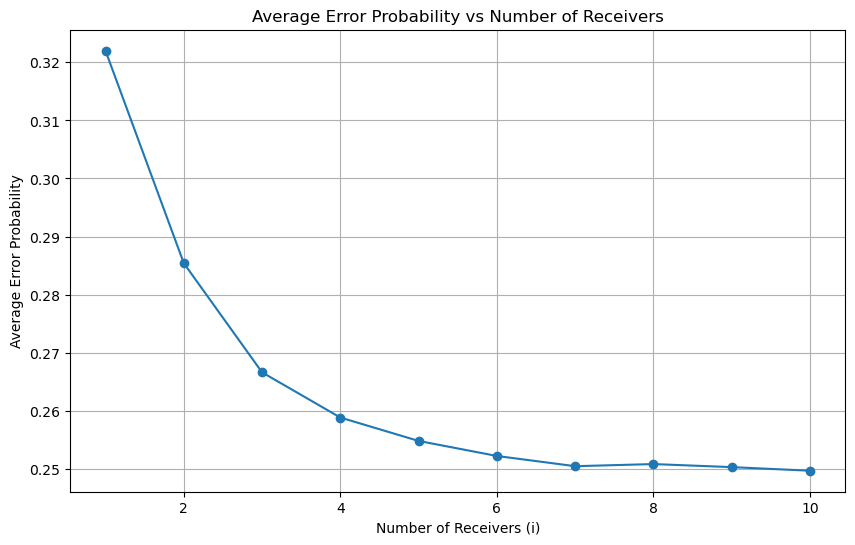

In [10]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_receivers, error_probabilities, marker='o')
plt.xlabel('Number of Receivers (i)')
plt.ylabel('Average Error Probability')
plt.title('Average Error Probability vs Number of Receivers')
plt.grid(True)
plt.show()

In [2]:
# Function to generate samples for H0 and H1
def generate_samples(num_samples, num_receivers):
    s_samples = np.random.rayleigh(scale=1, size=(num_samples, num_receivers))
    n_samples = np.random.normal(loc=0, scale=1, size=(num_samples, num_receivers))
    return s_samples, n_samples

In [3]:
# Monte Carlo simulation
for i in num_receivers:
    error_count = 0
    
    # Generate samples for H0 and H1
    s_samples, n_samples = generate_samples(num_simulations, i)
    
    # Compute x under H0 and H1
    x_H0 = n_samples
    x_H1 = s_samples + n_samples
    
    # Apply MAP decision rule: log-likelihood ratio test
    decision_H0 = np.sum(x_H0, axis=1)
    decision_H1 = np.sum(x_H1, axis=1)
    
    # Count errors
    errors_H0 = np.sum(decision_H0 > decision_H1)
    errors_H1 = np.sum(decision_H1 <= decision_H0)
    error_count = errors_H0 + errors_H1
    
    # Average error probability
    error_prob = error_count / (2 * num_simulations)
    error_probabilities.append(error_prob)

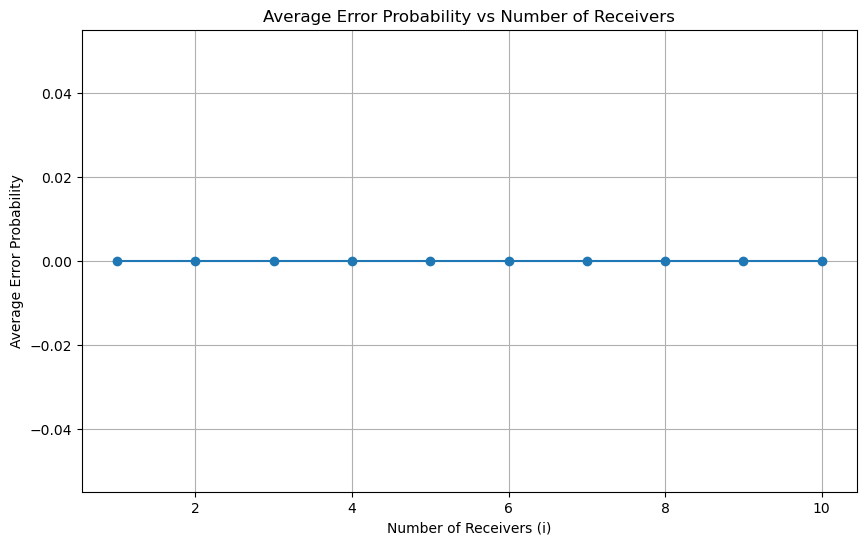

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_receivers, error_probabilities, marker='o')
plt.xlabel('Number of Receivers (i)')
plt.ylabel('Average Error Probability')
plt.title('Average Error Probability vs Number of Receivers')
plt.grid(True)
plt.show()

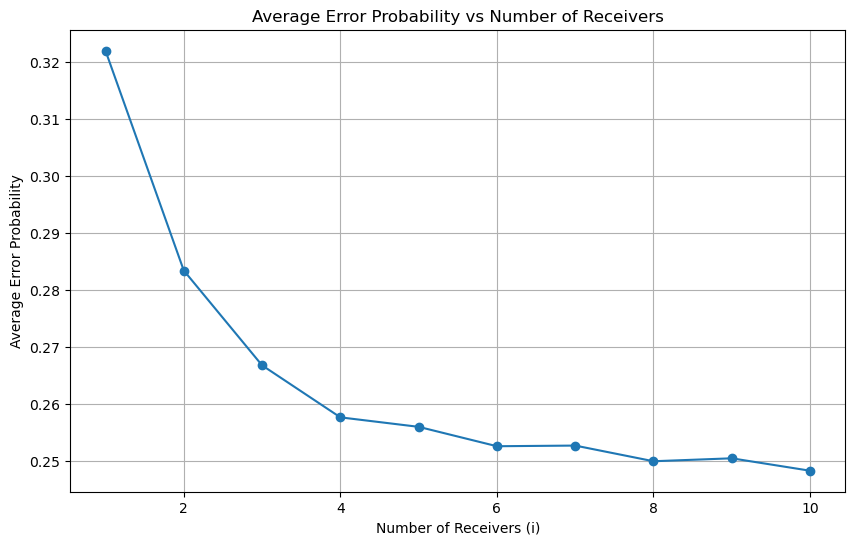